# Import Libraries and functions

In [48]:
# Import some libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

pd.set_option('display.max_columns', 300)

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import re
import string

import scipy
from textblob import TextBlob

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alecmccabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alecmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alecmccabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
from tqdm import tqdm
tqdm.pandas()

/Users/alecmccabe/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [50]:
import gensim

In [51]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("/Users/alecmccabe/Desktop/Flatiron/Projects/final_project_ideas/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [52]:
import gensim
import spacy

nlp = spacy.blank('en')

# Loop through range of all indexes, get words associated with each index.
# The words in the keys list will correspond to the order of the google embed matrix
keys = []
for idx in range(3000000):
    keys.append(wv.index2word[idx])

# Set the vectors for our nlp object to the google news vectors
nlp.vocab.vectors = spacy.vocab.Vectors(data=wv.syn0, keys=keys)

<ipython-input-52-5779fac04ac5>:13: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  nlp.vocab.vectors = spacy.vocab.Vectors(data=wv.syn0, keys=keys)


In [53]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [54]:
#set stopwords and punctuations
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["n't", "' '", "'re'","”","``","“","''","’","'s","'re","http","https","char","reuters","wall","street","journal","photo"]

In [55]:
def black_txt(token):
    return  token not in stopwords and token not in list(string.punctuation)  and len(token)>3

def clean_txt(text, string = True):
    clean_text = []
    clean_text2 = []
    text = text.lower()
    text = re.sub("'", "",text)
    text = re.sub("\n", "",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = re.sub('time magazine','',text)
    text = re.sub('breitbart','',text)
    text = re.sub('click','',text)
    
    clean_text = [ lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(text) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    
    if string == True:
        return " ".join(clean_text2)
    else:
        return clean_text2

# Load data

In [56]:
#load in data
data = pd.read_csv('clean_data2.csv', index_col = 0)

In [57]:
data = pd.get_dummies(data,prefix='topic',columns=['dominant_topic'])

In [58]:
print(data.shape)
data.head()

(15735, 29)


,source,author,title,url,publishedAt,content,target,month,full_text,url_subpages,predictor,pred_len,Stats,n_words,n_long_words,n_monosyllable_words,n_polysyllable_words,n_unique_words,polarity,subjectivity,coleman_index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
0,breitbart-news,Gabrielle Reyes,Xi Honors Doc Who Suggested Foreign Coronaviru...,https://www.breitbart.com/asia/2020/09/08/chin...,2020-09-09 17:19:38+00:00,Chinese dictator Xi Jinping on Tuesday present...,far_right,9.0,Chinese dictator Xi Jinping on Tuesday present...,asia,Xi Honors Doc Who Suggested Foreign Coronaviru...,3610,"{'n_chars': 2974, 'n_long_words': 201, 'n_mono...",542,0.370849,0.560886,0.190037,0.525830,0.528369,0.303881,0.765471,0,0,0,0,0,0,1,0
1,breitbart-news,Frances Martel,China Prepares to Fight Coronavirus Lawsuits -...,https://www.breitbart.com/asia/2020/05/27/chin...,2020-05-27 16:49:38+00:00,"China’s National People’s Congress (NPC), one ...",far_right,5.0,"China’s National People’s Congress (NPC), one ...",asia,China Prepares to Fight Coronavirus Lawsuits -...,5646,"{'n_chars': 4646, 'n_long_words': 292, 'n_mono...",875,0.333714,0.587429,0.181714,0.412571,0.490295,0.236853,0.609734,0,0,0,0,0,0,1,0
2,breitbart-news,"Thomas D. Williams, Ph.D.",Pope Calls on All Religions to Join in Prayer...,https://www.breitbart.com/health/2020/05/14/po...,2020-05-14 16:07:37+00:00,ROME Pope Francis has asked people of all reli...,far_right,5.0,ROME — Pope Francis has asked people of all re...,health,Pope Calls on All Religions to Join in Prayer....,2430,"{'n_chars': 1940, 'n_long_words': 103, 'n_mono...",407,0.253071,0.687961,0.135135,0.501229,0.622641,0.429667,0.800292,0,0,1,0,0,0,0,0
3,breitbart-news,John Hayward,Report: China Quietly Keeping Residences Quara...,https://www.breitbart.com/national-security/20...,2020-04-16 16:40:37+00:00,A report at the Epoch Times on Tuesday said th...,far_right,4.0,A report at the Epoch Times on Tuesday said th...,national-security,Report: China Quietly Keeping Residences Quara...,3843,"{'n_chars': 3147, 'n_long_words': 167, 'n_mono...",620,0.269355,0.658065,0.143548,0.524194,0.553039,0.404345,0.738316,0,0,1,0,0,0,0,0
4,breitbart-news,Simon Kent,"Shoot Stray Dogs, Win Cash Prizes: How Chinese...",https://www.breitbart.com/asia/2020/03/16/shoo...,2020-03-16 14:49:40+00:00,A southern China community neighbourhood manag...,far_right,3.0,A southern China community neighbourhood manag...,asia,"Shoot Stray Dogs, Win Cash Prizes: How Chinese...",2754,"{'n_chars': 2225, 'n_long_words': 121, 'n_mono...",454,0.266520,0.640969,0.129956,0.579295,0.531997,0.372161,0.671761,0,0,0,0,0,0,1,0


# Build Class Transformers, Pipeline

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

    
class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return [{'pol':  row['polarity'], 
                 'sub': row['subjectivity'],
                 'n_long_words': row['n_long_words'], 
                 'n_monosyllable_words': row['n_monosyllable_words'], 
                 'n_polysyllable_words': row['n_polysyllable_words'], 
                 'n_unique_words': row['n_unique_words'],
                 'coleman_index': row['coleman_index'],
                'topic_0': row['topic_0'],
                'topic_1': row['topic_1'],
                'topic_2': row['topic_2'],
                'topic_3': row['topic_3'],
                'topic_4': row['topic_4'],
                'topic_5': row['topic_5'],
                'topic_6': row['topic_6'],
                'topic_7': row['topic_7'],} for _, row in data.iterrows()]

In [60]:
pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the text
            ('text', Pipeline([
                ('selector', ItemSelector(key='predictor')),
                ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 10), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = None, preprocessor=clean_txt)),
            ])),

            # Pipeline for pulling metadata features
            ('stats', Pipeline([
                ('selector', ItemSelector(key=['polarity', 
                                               'subjectivity', 
                                              'n_long_words',
                                              'n_monosyllable_words',
                                              'n_polysyllable_words',
                                              'n_unique_words',
                                               'coleman_index',
                                              'topic_0',
                                              'topic_1',
                                              'topic_2',
                                              'topic_3',
                                              'topic_4',
                                              'topic_5',
                                              'topic_6',
                                              'topic_7',])),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'text': 0.9,
            'stats': 1.5,
        },
    ))
])

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
seed = 40
X = data[['predictor', 'polarity', 'subjectivity','n_long_words','n_monosyllable_words',
         'n_polysyllable_words','n_unique_words','coleman_index','topic_0','topic_1','topic_2','topic_3',
         'topic_4','topic_5','topic_6','topic_7']]

y =data['target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [62]:
pipeline.fit(x_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='predictor')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_df=0.2,
                                                                                  min_df=3,
                                                                                  ngram_range=(1,
                                                                                               10),
                                                                                  preprocessor=<function clean_txt at 0x12effc940>,
                                                                                  smooth_idf=1,
                                                      

In [63]:
%%time
train_vec = pipeline.transform(x_train)
test_vec = pipeline.transform(x_test)
print("Checking that the number of features in train and test correspond: %s - %s" % (train_vec.shape, test_vec.shape))

Checking that the number of features in train and test correspond: (12588, 1307220) - (3147, 1307220)
CPU times: user 2min 17s, sys: 3.32 s, total: 2min 20s
Wall time: 2min 26s


# Test different models

In [68]:
from sklearn.metrics import plot_confusion_matrix

In [64]:
results = pd.DataFrame(columns = ['model','accuracy'])
results

,model,accuracy


In [65]:
new_row = {'model': 'Dummy', 'accuracy': .29173}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.29173


In [66]:
#Linear Support Vector Machines
sv_clf = LinearSVC(C=1, class_weight='balanced', multi_class='ovr', random_state=40,verbose=3) 
sv_clf.fit(train_vec, y_train)
test_preds = sv_clf.predict(test_vec)

[LibLinear]

In [67]:
accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'SVM', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699


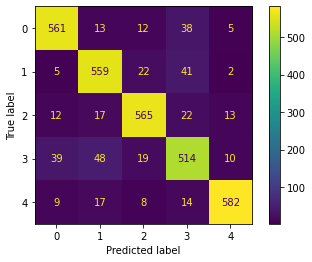

In [70]:
plot_confusion_matrix(sv_clf,test_vec,y_test)

In [71]:
#Random Forest
rfc_clf = RandomForestClassifier(n_estimators=200,random_state=0,n_jobs=-1,verbose=1)
rfc_clf.fit(train_vec, y_train)
test_preds = rfc_clf.predict(test_vec)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.9s finished


In [72]:
accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'RFC', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.808389


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.1s finished


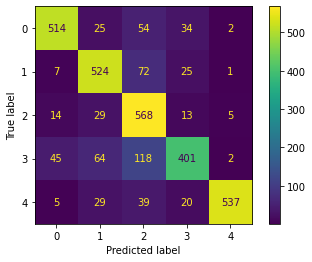

In [73]:
plot_confusion_matrix(rfc_clf,test_vec,y_test)

**MNB**

In [74]:
#Multinomial Bayes
mnb_lemma = MultinomialNB()
mnb_lemma.fit(train_vec, y_train)
test_preds = mnb_lemma.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'MNB', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.808389
3,MNB,0.654274


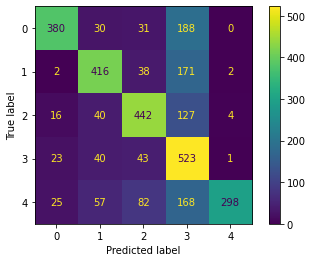

In [75]:
plot_confusion_matrix(mnb_lemma,test_vec,y_test)

**Test out Word2Vec**

In [76]:
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        
        return [self.nlp(text).vector for text in X]

In [77]:
X = data['predictor']
y =data['target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [78]:
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", RandomForestClassifier(random_state=0,n_jobs=-1, verbose=1)),
    ]
)
embeddings_pipeline.fit(x_train, y_train)
y_pred = embeddings_pipeline.predict(x_test)
cr = classification_report(y_test, y_pred,output_dict=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
accuracy = accuracy_score(y_test, y_pred)

new_row = {'model': 'word2vec', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.808389
3,MNB,0.654274
4,word2vec,0.712742


**PAC**

In [82]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [83]:
#Random Forest
pac_clf = PassiveAggressiveClassifier()
pac_clf.fit(train_vec, y_train)
test_preds = pac_clf.predict(test_vec)

In [84]:
accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'PAC', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.808389
3,MNB,0.654274
4,word2vec,0.712742
5,PAC,0.886876


**Deep Learning, Spacy**

In [85]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

In [86]:
from sklearn.model_selection import train_test_split
import time
X = data['predictor']
y =data['target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y)
##Create the tf-idf vector
vectorizer = TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = None, preprocessor=clean_txt)

In [87]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify =y)
vectorizer.fit(x_train)

TfidfVectorizer(max_df=0.2, min_df=3,
                preprocessor=<function clean_txt at 0x12effc940>, smooth_idf=1,
                strip_accents='unicode', sublinear_tf=1,
                token_pattern='\\w{1,}', use_idf=1)

In [89]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
 
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]
print(X_train_sequences[0])

[16093, 11973, 15382, 26137, 23197, 16093, 16756, 15534, 4104, 16929, 9816, 22035, 21151, 11973, 15382, 26137, 20298, 16439, 19223, 23197, 13746, 23197, 1872, 7673, 1705, 19000, 1527, 25205, 2635, 12288, 23847, 23883, 9801, 21613, 19570, 19647, 9815, 4651, 19890, 21338, 21151, 23883, 20298, 6666, 16092, 262, 16208, 23557, 21074, 20298, 8360, 17804, 22085, 21074, 15586, 22007, 4374, 9828, 7694, 13907, 18027, 6385, 23197, 19223, 25831, 19696, 16093, 12382, 15534, 13639, 6387, 1521, 21151, 22882, 15351, 13663, 18148, 21151, 8089, 183, 16095, 13896, 23136, 20298, 6387, 16929, 9828, 18866, 15042, 11717, 19137, 5562, 11307, 1226, 6010, 14504, 26137, 3930, 13895, 21679, 23653, 72, 7666, 18555, 12071, 21338, 11363, 22479, 26289, 16756, 14269, 18635, 20298, 17804, 26345, 21074, 1527, 21338, 1030, 4558, 23653, 25697, 6388, 23173, 8008, 17802, 22454, 21970, 14504, 6387, 9829, 21613, 6103, 20298, 13895, 10581, 17975, 23096, 4410, 21338, 26591, 7393, 3323, 14504, 21074, 5361, 24153, 9829, 21613, 21

In [90]:
# Compute the max lenght of a text

MAX_SEQ_LENGHT=60

N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

[13895 21679 23653    72  7666 18555 12071 21338 11363 22479 26289 16756
 14269 18635 20298 17804 26345 21074  1527 21338  1030  4558 23653 25697
  6388 23173  8008 17802 22454 21970 14504  6387  9829 21613  6103 20298
 13895 10581 17975 23096  4410 21338 26591  7393  3323 14504 21074  5361
 24153  9829 21613 21338 15382 12275  1798  9828 23084 17233  1325 18608]


In [91]:
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [92]:
EMBEDDINGS_LEN = 300

embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass
      
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)

EMBEDDINGS_LEN= 300


In [93]:
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(300, dropout=0.2))
model.add(Dense(len(set(y)), activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 300)           8068200   
_________________________________________________________________
lstm (LSTM)                  (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 5)                 1505      
Total params: 8,790,905
Trainable params: 722,705
Non-trainable params: 8,068,200
_________________________________________________________________
None


In [94]:
model.fit(X_train_sequences, y_train, 
          epochs=5, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate(X_test_sequences, y_test, verbose=1)
print("Accuracy:", scores[1])  #
list_result.append(("LSTM Simple", scores[1]))


Epoch 1/5
89/89 [==============================] - 22s 246ms/step - loss: 1.4670 - accuracy: 0.3858 - val_loss: 1.3528 - val_accuracy: 0.4400
Epoch 2/5
89/89 [==============================] - 23s 262ms/step - loss: 1.3110 - accuracy: 0.4646 - val_loss: 1.2655 - val_accuracy: 0.4829
Epoch 3/5
89/89 [==============================] - 24s 267ms/step - loss: 1.2252 - accuracy: 0.5097 - val_loss: 1.1595 - val_accuracy: 0.5330
Epoch 4/5
89/89 [==============================] - 27s 309ms/step - loss: 1.1533 - accuracy: 0.5363 - val_loss: 1.1438 - val_accuracy: 0.5330
Epoch 5/5
99/99 [==============================] - 4s 43ms/step - loss: 1.1334 - accuracy: 0.5462
Accuracy: 0.5462344884872437


NameError: name 'list_result' is not defined

In [95]:
accuracy = scores[1]

new_row = {'model': 'LSTM-Simple', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.808389
3,MNB,0.654274
4,word2vec,0.712742
5,PAC,0.886876
6,LSTM-Simple,0.546234


**LSTM with new features**

In [96]:
from keras.models import Model
from keras.layers import Dense ,LSTM,concatenate,Input,Flatten,BatchNormalization, GRU

text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(2,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))(text_data)
x2 = ((LSTM(300, dropout=0.2, recurrent_dropout=0.2)))(x)
x4 = concatenate([x2, meta_data])
x5 = Dense(150, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model = Model(inputs=[text_data, meta_data ], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 60, 300)      8068200     text[0][0]                       
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 300)          721200      embedding_1[0][0]                
__________________________________________________________________________________________________
meta (InputLayer)               [(None, 2)]          0                                            
_______________________________________________________________________________________

In [97]:
df_cat_train = data.iloc[x_train.index][['polarity', 'subjectivity']]
df_cat_test = data.iloc[x_test.index][['polarity', 'subjectivity']]

In [98]:
model.fit([X_train_sequences, df_cat_train], y_train, 
          epochs=12, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate([X_test_sequences, df_cat_test],y_test, verbose=1)
print("Accuracy:", scores[1])  

Epoch 1/12
89/89 [==============================] - 34s 378ms/step - loss: 1.3770 - accuracy: 0.4278 - val_loss: 1.5437 - val_accuracy: 0.3638
Epoch 2/12
89/89 [==============================] - 36s 405ms/step - loss: 1.1988 - accuracy: 0.5087 - val_loss: 1.5006 - val_accuracy: 0.3916
Epoch 3/12
89/89 [==============================] - 38s 423ms/step - loss: 1.1189 - accuracy: 0.5481 - val_loss: 1.4023 - val_accuracy: 0.4885
Epoch 4/12
89/89 [==============================] - 43s 480ms/step - loss: 1.0601 - accuracy: 0.5695 - val_loss: 1.2726 - val_accuracy: 0.5353
Epoch 5/12
89/89 [==============================] - 42s 468ms/step - loss: 1.0138 - accuracy: 0.5947 - val_loss: 1.1843 - val_accuracy: 0.5560
Epoch 6/12
89/89 [==============================] - 39s 442ms/step - loss: 0.9794 - accuracy: 0.6120 - val_loss: 1.0790 - val_accuracy: 0.5870
Epoch 7/12
89/89 [==============================] - 39s 438ms/step - loss: 0.9384 - accuracy: 0.6321 - val_loss: 1.0488 - val_accuracy: 0.5743

In [99]:
accuracy = scores[1]

new_row = {'model': 'LSTM-Advanced', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.808389
3,MNB,0.654274
4,word2vec,0.712742
5,PAC,0.886876
6,LSTM-Simple,0.546234
7,LSTM-Advanced,0.628853


In [102]:
results = results.sort_values(by='accuracy', ascending=True)
results.reset_index(drop=True, inplace=True)

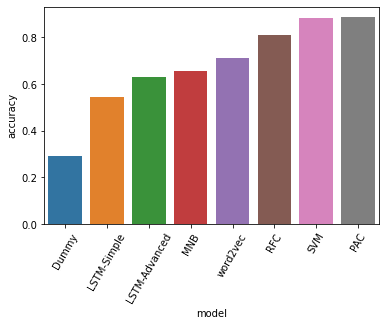

In [104]:
ax = sns.barplot(x=results.model, y=results.accuracy, data=results)
l = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()